# Plotting MPAS unstructured triangular grid through the UxDataArray.plot() accessor.  
 - Switching between Bokeh and Matplotlib backends for different rendering capabilities
   - Bokeh serves as the default renderer. 
   - Switch to Matplotlib by specifying the backend parameter
 - Periodic Data: periodic_elements='split': Periodic polygons are split along the antimeridian

From Michael Duda:
https://www2.mmm.ucar.edu/projects/mpas/tutorial/Howard2024/
plot_qv.py


Ming Ge Feb 2025

**Modified for WCRP Hackathon by Julia Kukulies, May 2025**

In [ ]:
from pathlib import Path 
import xarray as xr
import uxarray as ux
ux.__version__

In [9]:
# we will use uxarray's function .from_healpix() to create an uxDataset instance from a HEALpix file 
help(ux.UxDataset.from_healpix)

Help on method from_healpix in module uxarray.core.dataset:

from_healpix(ds: 'Union[str, os.PathLike, xr.Dataset]', **kwargs) class method of uxarray.core.dataset.UxDataset
    Loads a dataset represented in the HEALPix format into a ``ux.UxDataSet``, paired
    with a ``Grid`` containing information about the HEALPix definition.

    Parameters
    ----------
    ds: str, os.PathLike, xr.Dataset
        Reference to a HEALPix Dataset

    Returns
    -------
    cls
        A ``ux.UxDataset`` instance



In [33]:
# Read in common format data for WCRP Hackathon, e.g. from the E3SM/ SCREAM 

# Note: this can be replaced by any HEALpix file available for the Hackathon, also the ones available through catalogues
# You only need to have a xr.Dataset instance first, in order to convert it to a ux.Dataset
dir_data = Path('/glade/derecho/scratch/digital-earths-hackathon/e3sm/')
flnm_data = dir_data  /  'scream3D_ne120_hus_hp8_v7.zarr'

# open dataset as xarray first 
ds = xr.open_dataset(flnm_data)

# convert to uxarray dataset from HEALpix  
uds = ux.UxDataset.from_healpix(ds)

##### Look at this specific dataset

In [38]:
# same as xarray - look at the dimensions and all the attributes
uds.dims

FrozenMappingWarningOnValuesAccess({'crs': 0, 'time': 3168, 'level': 25, 'n_face': 786432})

In [36]:
uds

<xarray.UxDataset> Size: 249GB
Dimensions:  (crs: 0, time: 3168, level: 25, n_face: 786432)
Coordinates:
  * crs      (crs) float64 0B 
    lev      (level) int64 200B ...
  * time     (time) object 25kB 2019-08-01 03:00:00 ... 2020-09-01 00:00:00
Dimensions without coordinates: level, n_face
Data variables:
    hus      (time, level, n_face) float32 249GB ...

In [37]:
uds.hus

<xarray.UxDataArray 'hus' (time: 3168, level: 25, n_face: 786432)> Size: 249GB
[62285414400 values with dtype=float32]
Coordinates:
    lev      (level) int64 200B ...
  * time     (time) object 25kB 2019-08-01 03:00:00 ... 2020-09-01 00:00:00
Dimensions without coordinates: level, n_face
Attributes:
    averaging_count_tracker:  avg_count_Scalar3D_ncol_lev
    long_name:                qv
    units:                    kg/kg

In [41]:
times = uds.time.values 
print('Dataset covers the following period:', times[0], 'to', times[-1])

Dataset covers the following period: 2019-08-01 03:00:00 to 2020-09-01 00:00:00


##### Select a model level and time step 

In [40]:
qv =  uds.hus.sel(level = 14, time = times[0])

#### Interactive Plotting 

UXarray seamless integrates with **hvPlot**, tailors plot and makes it interactive

In [30]:
qv.plot(backend='bokeh', cmap='Grays', clim = (0, 0.01), features=["states", "coastline"],
           periodic_elements="split", title ='Mid-level specific humidity [kg/kg] @ ' + str(times[0]))

:Overlay
   .Image.I     :Image   [Longitude,Latitude]   (Longitude_Latitude hus)
   .Coastline.I :Feature   [Longitude,Latitude]
   .States.I    :Feature   [Longitude,Latitude]

#### Switch to Matplotlib by specifying the backend parameter

:Overlay
   .Image.I     :Image   [Longitude,Latitude]   (Longitude_Latitude hus)
   .Coastline.I :Feature   [Longitude,Latitude]
   .States.I    :Feature   [Longitude,Latitude]
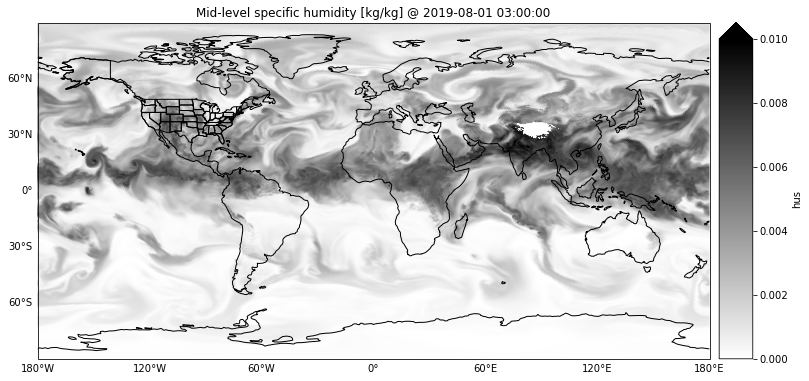

In [42]:
qv.plot.polygons(backend='matplotlib', pixel_ratio = 4.0, features=["states", "coastline"],
         width=1000, height=500, cmap='Gray_r', clim = (0, 0.01),
         periodic_elements="split", title ='Mid-level specific humidity [kg/kg] @ ' + str(times[0]))
